In [69]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

# Load Datasets

In [70]:
train = pd.read_csv(r'F:\AAA Machine Learning\Kaggle\Deep Learning\train.csv')
test = pd.read_csv(r'F:\AAA Machine Learning\Kaggle\Deep Learning\test.csv')
submission = pd.read_csv(r'F:\AAA Machine Learning\Kaggle\Deep Learning\sample_submission.csv')

In [71]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
print(train.shape)
print(test.shape)
print(submission.shape)

(42000, 785)
(28000, 784)
(28000, 2)


# Scalling the Data 

In [74]:
test = test/255

y = train['label']
X = train.drop(columns=['label'],axis = 1)

In [75]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
# Scalling the X_train,X_test

X_train = X_train/255
X_test = X_test/255

In [79]:
model = keras.Sequential([
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3370 - accuracy: 0.9038
Epoch 2/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1549 - accuracy: 0.9544
Epoch 3/100
1050/1050 [==============================] - 3s 2ms/step - loss: 0.1078 - accuracy: 0.9680
Epoch 4/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0810 - accuracy: 0.9772
Epoch 5/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0636 - accuracy: 0.9807
Epoch 6/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0512 - accuracy: 0.9848
Epoch 7/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0405 - accuracy: 0.9881
Epoch 8/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0314 - accuracy: 0.9906
Epoch 9/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0251 - accuracy: 0.9933
Epoch 10/100
1050/1050 [==============================] - 3s 3ms/step - l

1050/1050 [==============================] - 3s 3ms/step - loss: 0.0094 - accuracy: 0.9978
Epoch 79/100
1050/1050 [==============================] - 3s 3ms/step - loss: 5.5294e-04 - accuracy: 0.9998
Epoch 80/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0011 - accuracy: 0.9997
Epoch 81/100
1050/1050 [==============================] - 3s 3ms/step - loss: 5.0314e-05 - accuracy: 1.0000
Epoch 82/100
1050/1050 [==============================] - 3s 3ms/step - loss: 2.1746e-05 - accuracy: 1.0000
Epoch 83/100
1050/1050 [==============================] - 3s 3ms/step - loss: 1.4286e-05 - accuracy: 1.0000
Epoch 84/100
1050/1050 [==============================] - 3s 3ms/step - loss: 1.0844e-05 - accuracy: 1.0000
Epoch 85/100
1050/1050 [==============================] - 3s 3ms/step - loss: 8.4112e-06 - accuracy: 1.0000
Epoch 86/100
1050/1050 [==============================] - 3s 3ms/step - loss: 6.8678e-06 - accuracy: 1.0000
Epoch 87/100
1050/1050 [=========================

In [80]:
model.evaluate(X_test,y_test)

263/263 [==============================] - 1s 2ms/step - loss: 0.2335 - accuracy: 0.9743


[0.2334894835948944, 0.9742857217788696]

263/263 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

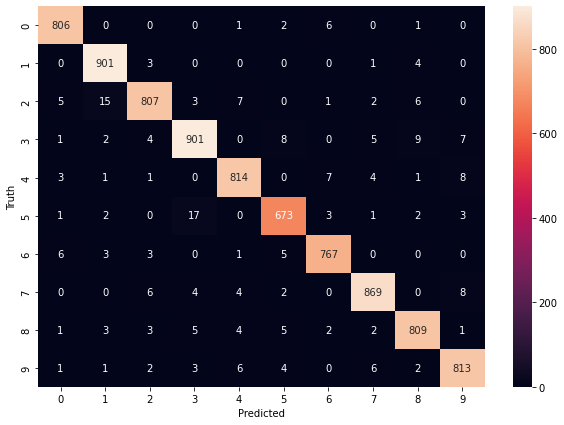

In [81]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [82]:
y_pred = model.predict(test)
y_pred_labels = [np.argmax(i) for i in y_pred]

875/875 [==============================] - 2s 2ms/step


In [83]:
y_pred_labels[100:115]

[0, 9, 2, 0, 7, 3, 0, 5, 0, 8, 0, 0, 4, 7, 1]

In [84]:
#y_pred_labels
ids = [i for i in range(1,28000+1)]

submit = pd.DataFrame({'ImageId':ids,'Label':y_pred_labels},index=None)


In [85]:
submit.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [86]:
submit.to_csv('F:\AAA Machine Learning\Kaggle\Deep Learning\Submission\submission2.csv',index=False)